In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

## Load and process Data.

In [2]:
#read file from dataset directory
filename = 'Dataset/iris.data'
df = pd.read_csv(filename, header = None)

#create columns
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "Class"]

# #Convert class names into values
df.Class.replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),(1,2,3), inplace=True)

In [3]:
#Dataset to be used for normal Euclidean distance and Cosine Similarity
df

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [4]:
#data chosen for normalization
data = df.iloc[0:,0:4]
x = data.values.tolist()

In [5]:
#Calculate MinMax
# df_list = df.values.tolist()
minmax = list()
for i in range(len(x[0])):
    col_values = [row[i] for row in x]
    value_min = min(col_values)
    value_max = max(col_values)
    minmax.append([value_min, value_max])
    
#Calculate Normalized dataset
normalizedList = list(x)
for row in normalizedList:
    for i in range(len(row)):
        row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [6]:
df_normalized = pd.DataFrame(normalizedList)

In [7]:
df_normalized['Class'] = df['Class'].values
df_normalized.columns = ["sepal length", "sepal width", "petal length", "petal width", "Class"]

Dataset to be used for Normalized Euclidean distance 

In [124]:
# df_normalized

In [9]:
from sklearn.model_selection import train_test_split

## Divide the dataset as train, development and test. Make sure randomly divide the dataset.

In [10]:
#Dividing the data for development and test data split
x = df.iloc[0:,0:4]
y = df.iloc[0:,-1]
x_normalized = df_normalized.iloc[0:,0:4]
y_normalized = df_normalized.iloc[0:,-1]

In [11]:
X_train, X_test_dev, y_train, y_test_dev = train_test_split(x,y,test_size = 0.4)
X_normalized_train, X_normalized_test_dev, y_normalized_train, y_normalized_test_dev = train_test_split(x_normalized,y_normalized,test_size = 0.4)

In [12]:
df_train = X_train
df_test_dev = X_test_dev
df_normalized_train = X_normalized_train
df_normalized_test_dev = X_normalized_test_dev

In [14]:
df_train['Class'] = y_train
df_test_dev['Class'] = y_test_dev
df_normalized_train['Class'] = y_normalized_train
df_normalized_test_dev['Class'] = y_normalized_test_dev

<ipython-input-14-4aed76c3dbca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Class'] = y_train
<ipython-input-14-4aed76c3dbca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_dev['Class'] = y_test_dev
<ipython-input-14-4aed76c3dbca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [15]:
a = df_test_dev.iloc[0:,0:4]
b = df_test_dev.iloc[0:,-1]
a_normalized = df_normalized_test_dev.iloc[0:,0:4]
b_normalized = df_normalized_test_dev.iloc[0:,-1]

In [16]:
X_dev, X_test, y_dev, y_test = train_test_split(a,b,test_size = 0.5)
X_normalized_dev, X_normalized_test, y_normalized_dev, y_normalized_test = train_test_split(a_normalized,b_normalized,test_size = 0.5)

In [17]:
df_dev = X_dev
df_test = X_test
df_normalized_dev = X_normalized_dev
df_normalized_test = X_normalized_test

In [18]:
df_dev['Class'] = y_dev
df_test['Class'] = y_test
df_normalized_dev['Class'] = y_normalized_dev
df_normalized_test['Class'] = y_normalized_test

<ipython-input-18-caadb1560127>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['Class'] = y_dev
<ipython-input-18-caadb1560127>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Class'] = y_test
<ipython-input-18-caadb1560127>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [19]:
df_train_list = df_train.values.tolist()
df_train_normalized_list = df_normalized_train.values.tolist()
df_dev_list = df_dev.values.tolist()
df_dev_normalized_list = df_normalized_dev.values.tolist()
df_test_list = df_test.values.tolist()
df_test_normalized_list = df_normalized_test.values.tolist()

Train data and normalized train data list

In [20]:
# df_train_list
# df_train_normalized_list

Dev data and normalized dev data list

In [21]:
# df_dev_list
# df_dev_normalized_list

Test data and normalized test data list

In [22]:
# df_test_list
# df_test_normalized_list

## Implement kNN using the following hyperparameters

number of neighbor K -> 1,3,5,7

In [23]:
k_neighbors = [1,3,5,7]

Distance metrics:

In [97]:
class KNN(object):
    def __init__(self,k):
        self.k = k
    
    #Cosine similarity for datasets
    def cos_sim(self,row1, row2):
        sum = 0
        sum1 = 0
        sum2 = 0
        for i in range(len(row)-1):
            for i,j in zip(row1,row2):
                sum1 += i*i
                sum2 += j*j
                sum += i*j 
            cos = sum/((sqrt(sum1))*(sqrt(sum2)))
        return (1-cos)
    

    #Calculate Euclidean Distance between 2 vectors/rows.
    def calculateEuclideanDistance(self,row1, row2):
        for i in range(len(row1)-1):
            sum_sq = np.sum(np.square(row1[i] - row2[i]))
            a = (np.sqrt(sum_sq))
        return a
    
    #Prediction for cosine 
    def predictCosine(self, train,test_row, num_neighbors):
        distances = []
        for i in range(len(train)):
            dist = self.cos_sim(train[i][:-1], test_row)
            distances.append((train[i],dist))
        distances.sort(key = lambda x:x[1])
        
        neighbors = []
        for i in range(num_neighbors):
            neighbors.append(distances[i][0])
            
        classes = {}
        for i in range(len(neighbors)):
            a = neighbors[i][-1]
            if a in classes:
                classes[a] += 1
            else:
                classes[a] = 1
                
        sorted_class= sorted(classes.items(), key = lambda x:x[1], reverse = True)
        return sorted_class[0][0]
    
    #Prediction for euclidean and normalized euclidean
    def predict(self, train,test_row, num_neighbors):
        distances = []
        for i in range(len(train)):
            dist = self.calculateEuclideanDistance(train[i][:-1], test_row)
            distances.append((train[i],dist))
        distances.sort(key = lambda x:x[1])
        
        neighbors = []
        for i in range(num_neighbors):
            neighbors.append(distances[i][0])
            
        classes = {}
        for i in range(len(neighbors)):
            a = neighbors[i][-1]
            if a in classes:
                classes[a] += 1
            else:
                classes[a] = 1
                
        sorted_class= sorted(classes.items(), key = lambda x:x[1], reverse = True)
        return sorted_class[0][0]
    
    def evaluate(self,actual, predicted):
        correct = 0
        for act,pred in zip(actual,predicted):
            if act == pred:
                correct += 1
        return correct/len(actual)

In [181]:
knn = KNN(1)

## Calculating accuracy using Train and Development dataset , finding optimal hyper parameters and drawing bar charts for accuracy

### Drawing Graphs for visual representation of all three distance metrics and all values of k_neighbors

In [182]:
kevseuc = []
score_euclidean = []
for i in k_neighbors:
    pred_euclidean = []
    for row in df_dev_list:
        predict_only = row[:-1]
        prediction = knn.predict(df_train_list,predict_only,i)
        pred_euclidean.append(prediction)

    actual = np.array(df_dev_list)[:,-1]
    score_euclidean.append(knn.evaluate(actual, pred_euclidean))
    acc = knn.evaluate(actual, pred_euclidean)
    kevseuc.append((i,acc))

In [183]:
kevseuc

[(1, 0.8333333333333334),
 (3, 0.9333333333333333),
 (5, 0.9),
 (7, 0.9333333333333333)]

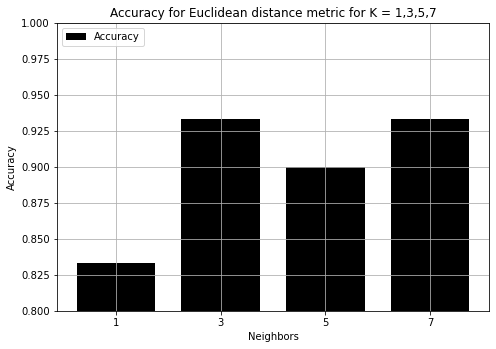

In [184]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors, score_euclidean, width =1.5, label = 'Accuracy', color = 'black')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Accuracy for Euclidean distance metric for K = 1,3,5,7')
ax.set_xticks(k_neighbors)
plt.ylim((0.8,1))
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

In [185]:
kevscos = []
score_cosine = []
for i in k_neighbors:
    pred_cosine = []
    for row in df_dev_list:
        predict_only = row[:-1]
        prediction = knn.predictCosine(df_train_list,predict_only,i)
        pred_cosine.append(prediction)

    actual = np.array(df_dev_list)[:,-1]
    score_cosine.append(knn.evaluate(actual, pred_cosine))
    acc = knn.evaluate(actual, pred_cosine)
    kevscos.append((i,acc))

In [186]:
kevscos

[(1, 0.9666666666666667),
 (3, 0.9666666666666667),
 (5, 0.9666666666666667),
 (7, 0.9333333333333333)]

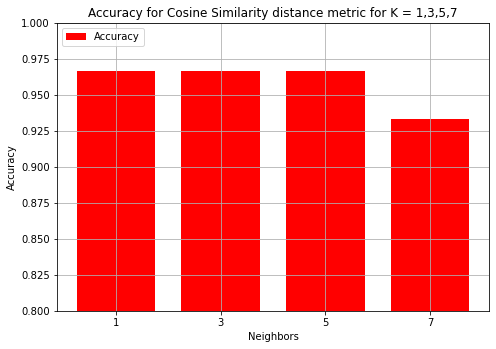

In [187]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors, score_cosine, width =1.5, label = 'Accuracy', color = 'red')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Accuracy for Cosine Similarity distance metric for K = 1,3,5,7')
ax.set_xticks(k_neighbors)
plt.ylim((0.8,1))
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

In [188]:
kevsnormal = []
score_normalized_eucl = []
for i in k_neighbors:
    pred_normalized_eucl = []
    for row in df_dev_normalized_list:
        predict_only = row[:-1]
        prediction = knn.predict(df_train_normalized_list,predict_only,i)
        pred_normalized_eucl.append(prediction)

    actual = np.array(df_dev_normalized_list)[:,-1]
    score_normalized_eucl.append(knn.evaluate(actual, pred_normalized_eucl))
    acc = knn.evaluate(actual, pred_normalized_eucl)
    kevsnormal.append((i,acc))

In [189]:
kevsnormal

[(1, 0.9333333333333333),
 (3, 0.9666666666666667),
 (5, 0.9666666666666667),
 (7, 0.9666666666666667)]

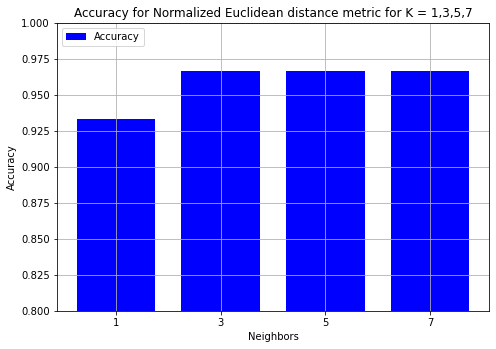

In [190]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors, score_normalized_eucl, width =1.5, label = 'Accuracy', color = 'b')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Accuracy for Normalized Euclidean distance metric for K = 1,3,5,7')
ax.set_xticks(k_neighbors)
plt.ylim((.8,1))
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

In [191]:
kevseuctest = []
score_euclidean_test = []
for i in k_neighbors:
    pred_euclidean_test = []
    for row in df_test_list:
        predict_only = row[:-1]
        prediction = knn.predict(df_train_list,predict_only,i)
        pred_euclidean_test.append(prediction)

    actual = np.array(df_test_list)[:,-1]
    score_euclidean_test.append(knn.evaluate(actual, pred_euclidean_test))
    acc = knn.evaluate(actual, pred_euclidean_test)
    kevseuctest.append((i,acc))

In [192]:
kevseuctest

[(1, 0.9), (3, 1.0), (5, 1.0), (7, 1.0)]

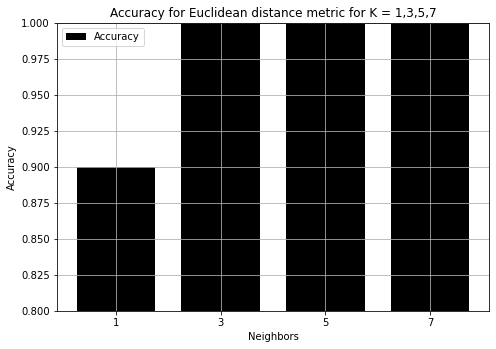

In [193]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors, score_euclidean_test, width =1.5, label = 'Accuracy', color = 'black')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Accuracy for Euclidean distance metric for K = 1,3,5,7')
ax.set_xticks(k_neighbors)
plt.ylim((0.8,1))
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

In [194]:
kevscostest = []
score_cosine_test = []
for i in k_neighbors:
    pred_cosine_test = []
    for row in df_test_list:
        predict_only = row[:-1]
        prediction = knn.predictCosine(df_train_list,predict_only,i)
        pred_cosine_test.append(prediction)

    actual = np.array(df_test_list)[:,-1]
    score_cosine_test.append(knn.evaluate(actual, pred_cosine_test))
    acc = knn.evaluate(actual, pred_cosine_test)
    kevscostest.append((i,acc))

In [195]:
kevscostest

[(1, 0.9333333333333333),
 (3, 0.9333333333333333),
 (5, 0.9333333333333333),
 (7, 0.9666666666666667)]

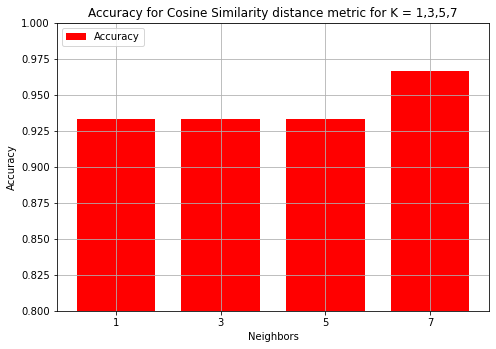

In [196]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors, score_cosine_test, width =1.5, label = 'Accuracy', color = 'red')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Accuracy for Cosine Similarity distance metric for K = 1,3,5,7')
ax.set_xticks(k_neighbors)
plt.ylim((0.8,1))
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

In [212]:
kevsnormaltest = []
score_normalized_eucl_test = []
for i in k_neighbors:
    pred_normalized_eucl_test = []
    for row in df_test_normalized_list:
        predict_only = row[:-1]
        prediction = knn.predict(df_train_normalized_list,predict_only,i)
        pred_normalized_eucl_test.append(prediction)

    actual = np.array(df_test_normalized_list)[:,-1]
    score_normalized_eucl_test.append(knn.evaluate(actual, pred_normalized_eucl_test))
    acc = knn.evaluate(actual, pred_normalized_eucl_test)
    kevsnormaltest.append((i,acc))

In [213]:
kevsnormaltest

[(1, 0.9333333333333333), (3, 0.9), (5, 0.9), (7, 0.9)]

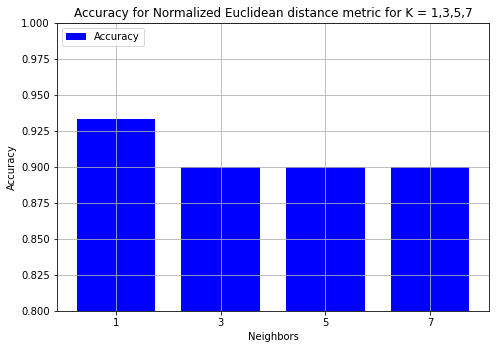

In [215]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors, score_normalized_eucl_test, width =1.5, label = 'Accuracy', color = 'blue')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Accuracy for Normalized Euclidean distance metric for K = 1,3,5,7')

ax.set_xticks(k_neighbors)
plt.ylim((.8,1))
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()

## Train vs Development and Train vs Test data Graph representation

In [216]:
k_neighbors = np.array(k_neighbors)

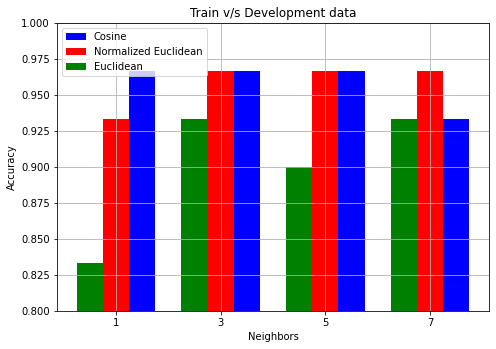

In [217]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors+0.5, score_cosine, width =0.5, label = 'Cosine', color='blue')
ax.bar(k_neighbors, score_normalized_eucl, width =0.5, label = 'Normalized Euclidean', color='red')
ax.bar(k_neighbors-0.5, score_euclidean, width =0.5, label = 'Euclidean', color = 'green')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Train v/s Development data')
ax.set_xticks(k_neighbors)
plt.ylim((.8,1))
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

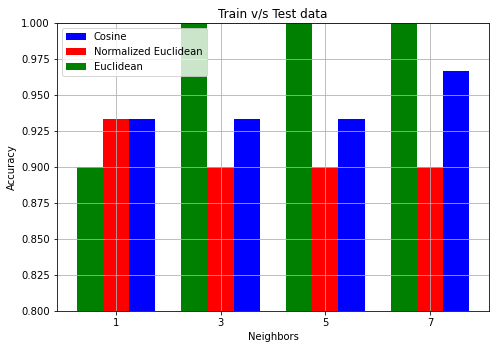

In [218]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(k_neighbors+0.5, score_cosine_test, width =0.5, label = 'Cosine', color = 'blue')
ax.bar(k_neighbors, score_normalized_eucl_test, width =0.5, label = 'Normalized Euclidean', color = 'red')
ax.bar(k_neighbors-0.5, score_euclidean_test, width =0.5, label = 'Euclidean', color = 'green')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')
ax.set_title('Train v/s Test data')
ax.set_xticks(k_neighbors)
plt.ylim((.8,1))
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## The optimal parameters will change for each iteration as the data is split into train, development and test randomly. For this iteration, from the above inferences it can be observed that Cosine similarity for k = 7 seems to be the best hyperparameter

In [221]:
score_cosine_final = []
pred_cosine_final = []
for row in df_test_list:
    predict_only = row[:-1]
    prediction = knn.predictCosine(df_train_list,predict_only,7)
    pred_cosine_final.append(prediction)

actual = np.array(df_test_list)[:,-1]
score_cosine_final.append(knn.evaluate(actual, pred_cosine_final))

In [236]:
print('Final accuracy is : %s' %(score_cosine_final[0]*100),'%')

Final accuracy is : 96.66666666666667 %
